In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados/municipios_mba.csv')

In [4]:
def describe(x):
    print('mean {:.8f}'.format(x.mean()))
    print('std  {:.8f}'.format(x.std()))
    print('min  {:.8f}'.format(x.min()))
    print('max  {:.8f}'.format(x.max()))

# Observações gerais

- É muito dificil saber de antemão se a normalização irá fornecer algum ganho de desempenho.
- Escolher somente um tipo de normalização
- Aplicar somente no conjunto `X_train` e não no conjunto completo `X`. Ao aplicar no conjunto `X_test`, deve se utilizar os parametros aprendidos no `X_train`


# Implementação dos normalizadores (aka *scalers*) apresentados em aula

In [4]:
def scaler_min_max(x, a=0, b=1):
    return a + (x - x.min())*(b - a) / (x.max() - x.min())

def scaler_mean(x):
    return (x - x.mean()) / (x.max() - x.min())

def scaler_zscore(x):
    return (x - x.mean()) / x.std()

def scaler_norm(x, norm='l1'):
    if norm == 'l1':  return x / np.abs(x).sum()
    if norm == 'l2':  return x / np.sqrt(np.sum(x ** 2))
    if norm == 'max': return x / x.max()
    return x

# Resumo geral dos *scalers* existentes no Scikit-learn

<table align="center">
	<thead>
		<tr>
			<th>Tipo</th>
			<th>Intervalo</th>
			<th>Média</th>
			<th>Desv. Padrão</th>
			<th>Observação</th>
		</tr>
    </thead>
    <tbody>
		<tr>
			<td>MinMaxScaler </td>
			<td>$[a,b]$*</td>
			<td>Varia</td>
			<td>Varia</td>
            <td>Restringe o intervalo e mantem a distribuição dos dados. É sensivel à outliers.</td>
		</tr>
		<tr>
			<td>StandardScaler</td>
			<td>Varia</td>
			<td>$0$</td>
			<td>$1$</td>
			<td>Não restringe o intervalo e transforma para a Distribuição Normal Padrão. É sensivel à outliers.</td>
		</tr>
		<tr>
			<td>RobustScaler</td>
			<td>Varia</td>
			<td>$0$*</td>
			<td>$1$*</td>
			<td>Não restringe o intervalo e transforma para média zero. É tolerante à outliers.</td>
		</tr>
		<tr>
			<td>Normalizer</td>
			<td>Varia</td>
			<td>Varia</td>
			<td>Varia</td>
			<td>Transforma a norma para $1$ para cada exemplo* e não para cada coluna.</td>
		</tr>
	</tbody>
</table>

\* Vide parâmetros na [documentação oficial](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

<table align="center">
	<thead>
		<tr>
			<th>Tipo</th>
			<th>Quando usar?</th>
		</tr>
    </thead>
    <tbody>
		<tr>
			<td>MinMaxScaler </td>
			<td>Quando os limites (sup. e inf.) dos dados são conhecidos</td>
        </tr>
		<tr>
			<td>StandardScaler</td>
			<td>Quando é necessário transformar o atributo em uma distribuição normal padrão<br>(assumindo que os dados já seguem um distribuição normal), podendo distorcer a distancia relativa entre os dados.<br>Além disso, alguns algoritmos esperam que essa transformação seja feita previamente.</td>
		</tr>
		<tr>
			<td>RobustScaler</td>
			<td>Similar ao StandardScaler, mas usado quando queremos que os outliers não tenham muita influência</td>
		</tr>
		<tr>
			<td>Normalizer</td>
			<td>1. Quando queremos simplificar calculos (e.g. distancia coseno, projeções, angulos)<br>2. Quando queremos oferecer estabilidade númerica (e.g. gradient descent, expectation maximization, regularization)<br>3. Quando queremos intepretar vetor como distribuição de probabilidades</td>
		</tr>
	</tbody>
</table>

Lista de algoritmos que comumente esperam dados normalizados/padronizados
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
- [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)
- [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)
- [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

# Compreendendo *scalers* na API do Scikit-learn

A bibilioteca fornece duas formas de utilizar os métodos de *scaling*: (i) por classes; (ii) por funções.

(i) As classes fornecem os métodos `fit` e `transform`, onde o primeiro permite ajustar aos dados e armazenar os parâmetros necessários para reutilizar no futuro sem precisar recalcula-los.

(ii) As funções calculam e transformam os dados, sendo necessário recalcular os parametros a cada chamada.

Por exemplo, ao utilizar a classe `MinMaxScaler` no conjunto de treino `X_train`, podemos (e devemos) utilizar os mesmo parâmetros aprendidos (min e max) no conjunto de teste `X_test`. Em contraste, se usarmos a função `minmax_scale` separadamente nos conjuntos `X_train` e `X_test`, os parametros (min e max) podem divergir para cada um dos conjuntos e portanto distorcer os resultados produzidos pelo algoritmo usado.

Abaixo segue as classes e funções de *scaling* equivalentes disponíveis no pacote `sklearn.preprocessing` obtida a partir da [documentação oficial](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing):
<table align="center">
	<thead>
		<tr>
			<th>Classe</th>
			<th>Função</th>
		</tr>
    </thead>
   <tbody>
		<tr>
			<td>MinMaxScaler</td>
			<td>minmax_scale</td>
		</tr>
     	<tr>
			<td>StandardScaler</td>
			<td>scale</td>
		</tr>
       	<tr>
			<td>RobustScaler</td>
			<td>robust_scale</td>
		</tr>
        <tr>
			<td>Normalizer</td>
			<td>normalize</td>
		</tr>
        <tbody>
</table>

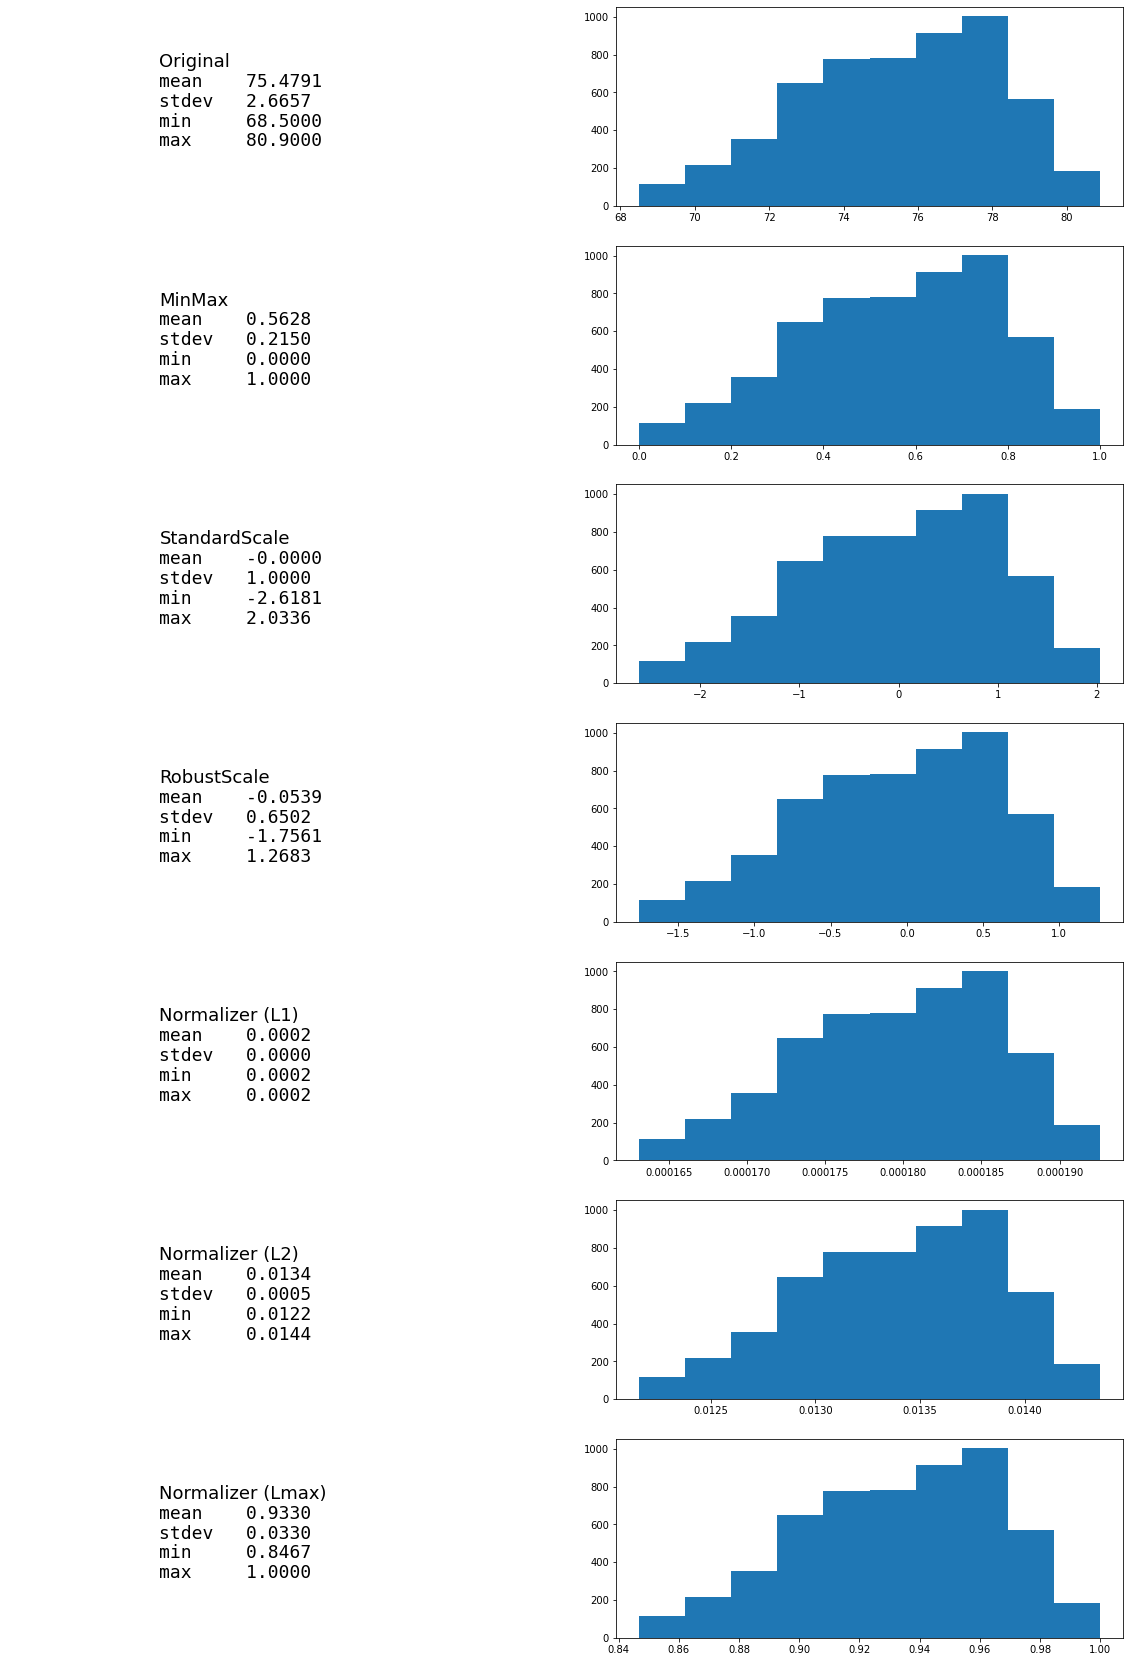

In [82]:
from sklearn.preprocessing import minmax_scale, scale, robust_scale, normalize

def plot_description(ax, x, title):
    ax.text(0.3, 0.7, title, fontsize=18)
    ax.text(0.3, 0.6, 'mean\t{:.4f}'.expandtabs().format(x.mean()), fontsize=18, fontfamily='monospace')
    ax.text(0.3, 0.5, 'stdev\t{:.4f}'.expandtabs().format(x.std()), fontsize=18, fontfamily='monospace')
    ax.text(0.3, 0.4, 'min\t{:.4f}'.expandtabs().format(x.min()), fontsize=18, fontfamily='monospace')
    ax.text(0.3, 0.3, 'max\t{:.4f}'.expandtabs().format(x.max()), fontsize=18, fontfamily='monospace')
    ax.axis('off')


x = df['expec_vida'].values
x_minmax = minmax_scale(x)
x_scale = scale(x)
x_robust = robust_scale(x)
x_normalize_l1 = normalize(x.reshape(-1,1), axis=0, norm='l1')
x_normalize_l2 = normalize(x.reshape(-1,1), axis=0, norm='l2')
x_normalize_max = normalize(x.reshape(-1,1), axis=0, norm='max')

_, axs = plt.subplots(7, 2, figsize=(20,30))
plot_description(axs[0,0], x, 'Original')
axs[0,1].hist(x)

plot_description(axs[1,0], x_minmax, 'MinMax')
axs[1,1].hist(x_minmax)

plot_description(axs[2,0], x_scale, 'StandardScale')
axs[2,1].hist(x_scale)

plot_description(axs[3,0], x_robust, 'RobustScale')
axs[3,1].hist(x_robust)

plot_description(axs[4,0], x_normalize_l1, 'Normalizer (L1)')
axs[4,1].hist(x_normalize_l1)

plot_description(axs[5,0], x_normalize_l2, 'Normalizer (L2)')
axs[5,1].hist(x_normalize_l2)

plot_description(axs[6,0], x_normalize_max, 'Normalizer (Lmax)')
axs[6,1].hist(x_normalize_max)

plt.show()

## Leitura Complementar

1. [About Feature Scaling and Normalization](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling)
